In [48]:
# Render our plots inline
%matplotlib inline
%pylab inline  
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# General Plotting Parameters
mpl.rcParams['figure.figsize'] = (8,5)
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['font.size'] = 14.
mpl.rcParams['legend.fontsize'] = 12.
mpl.rcParams['axes.labelsize'] = 12.
mpl.rcParams['xtick.labelsize'] = 10.
mpl.rcParams['ytick.labelsize'] = 10.
mpl.rcParams['xtick.minor.pad'] = 4
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

#Git says this is patched, but it doesn't work from Pip --upgrade 26-mar-2015
#mpl.rcParams['xtick.minor.visible'] = True  

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14),
             (255, 187, 120), (44, 160, 44), (152, 223, 138),
              (148, 103, 189),
             (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127),
             (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229),(214, 39, 40), (255, 152, 150)]  
    
# Scale the RGB values to the [0, 1] range,
# which is the format matplotlib accepts.  
for i in range(len(tableau20)): 
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

Populating the interactive namespace from numpy and matplotlib



In [49]:
import calc_enrich
reload(calc_enrich)
from calc_enrich import calc_del_U
from calc_enrich import stages_per_cascade
from calc_enrich import N_product_by_alpha
from calc_enrich import N_waste_by_alpha
from calc_enrich import machines_per_enr_stage
from calc_enrich import machines_per_strip_stage
from calc_enrich import product_per_enr_stage
from calc_enrich import waste_per_strip_stage
from calc_enrich import Npc_from_Nstages
from calc_enrich import Nwc_from_Nstages

For a type of centrifuge and some cascade guidelines, design the cascade
Start at nat U, enrich to 3.5%, 
Use IR-1 machines (Inst Sci Intl Security, IAEA 2014)

In [50]:
# centrifuge params 
omega = 64000
d = 0.1  # m 
Z = 2.0   # m
F_m_hrs = 70 # grams/hr  
T = 320.0   # K
cut = 0.5
eff = 0.4 # centrifuge efficiency

# cascade params
Nfc = 0.0071
Npc = 0.035
Nwc = 0.001
Fc_month = 739 #kg/month

# The feed enrichment to be used when using a cascade designed for LEU to produce HEU.
Nfc_mod = 0.20
Fc_month_mod = 46 #kg/month

#unit conversions
v_a = omega * (d/2.0)
F_m = F_m_hrs/(60*60*1000.0)
Fc = Fc_month/(30.4*24*60*60)
Fc_mod = Fc_month_mod/(30.4*24*60*60)


# Comparison numbers (not needed for calculations)
del_U_th_yr = 1.1 #swu/yr
del_U_obs_yr = 0.71 #Swu/yr
del_U_th = del_U_th_yr/(365.25*24*60*60) #kgSWU/sec
del_U_obs = del_U_obs_yr/(365.25*24*60*60)

Pc_month = 77 #kg/month


In [51]:
alpha, del_U, del_U_yr = calc_del_U(v_a, Z, d, F_m, T, cut, eff)
n_enrich_s, n_strip_s= stages_per_cascade(alpha, Nfc, Npc, Nwc)
print "number of enrich, strip stages is ", n_enrich_s, n_strip_s
#print del_U*60*60*24*365.25, del_U_th

L_F=  2.0
Z_p=   1.2
number of enrich, strip stages is  5.27965985885 6.39318734013


In [52]:
n_stage_en = int(round(n_enrich_s)) + 1  # add one for extra partial stage lost in rounding
epsilon = alpha - 1.0
# starting feed stages and enrichment are starting cascade values
Nfs = Nfc
Fs = Fc
print "stage, #mach, Feed,   Product,    N_F,     N_P"
# http://books.sipri.org/files/books/SIPRI83Krass/SIPRI83Krass05.pdf
# eqn 5.8 says Total # stages is N_strip + N_enrich + 1  (presumably the feed stage)
enrich_stages = []
for i in range(0, n_stage_en):  
    Nps = N_product_by_alpha(alpha, Nfs)
    n_mach = machines_per_enr_stage(alpha, del_U, Fs)
    Ps = product_per_enr_stage(alpha, Nfs, Nps, Fs)
    enrich_stages.append([i, n_mach])
    if (i == 1):
        W_enr1 = Fs - Ps
        Nw_enr1 = (Fs*Nfs - Ps*Nps)/W_enr1
    print i, n_mach, Fs, Ps,  Nfs, Nps
    Nfs = Nps
    Fs = Ps

print "feed for cascade (kg/mon)" , Fc*60*60*24*30
print "product of cascade (kg/mon)" , Fs*60*60*24*30

stage, #mach, Feed,   Product,    N_F,     N_P
0 41.1072959387 0.000281356603314 0.000140985486694 0.0071 0.00926337178009
1 20.5985289001 0.000140985486694 7.06935731207e-05 0.00926337178009 0.0120779050405
2 10.3286064624 7.06935731207e-05 3.54780839646e-05 0.0120779050405 0.0157340102248
3 5.18348629354 3.54780839646e-05 1.78248808898e-05 0.0157340102248 0.020473919445
4 2.60428454559 1.78248808898e-05 8.96855974207e-06 0.020473919445 0.0266031438416
5 1.31034152076 8.96855974207e-06 4.52096924189e-06 0.0266031438416 0.0345026265258
feed for cascade (kg/mon) 729.276315789
product of cascade (kg/mon) 11.718352275


In [53]:
n_stage_str = int(round(n_strip_s)) + 1  # add one for extra partial stage lost in rounding
epsilon = alpha - 1.0

F_strip = W_enr1
Nf_strip = Nw_enr1

print "stage, #mach,       Feed,    W_strip,   Nf_strip,   Nw_strip"
strip_stages = []
for i in range(1, n_stage_str):  
    Nw_strip = N_waste_by_alpha(alpha, Nf_strip)
    n_mach_s= machines_per_strip_stage(alpha, del_U, F_strip)
    W_strip = waste_per_strip_stage(alpha, Nf_strip, Nw_strip, F_strip)
    strip_stages.append([-1*i,n_mach_s])
    print i, n_mach_s, F_strip, W_strip, Nf_strip, Nw_strip
    F_strip = W_strip
    Nf_strip = Nw_strip

print "waste of cascade (kg/mon)" , W_strip*60*60*24*30

stage, #mach,       Feed,    W_strip,   Nf_strip,   Nw_strip
1 10.2699224377 7.02919135733e-05 4.58855350724e-05 0.00643275581404 0.0049271596703
2 6.70405544889 4.58855350724e-05 2.99640309978e-05 0.0049271596703 0.0037726125346
3 4.37786167176 2.99640309978e-05 1.95723391863e-05 0.0037726125346 0.0028878172878
4 2.85959501098 1.95723391863e-05 1.27872066102e-05 0.0028878172878 0.00221007375527
5 1.86826070604 1.27872066102e-05 8.35560507036e-06 0.00221007375527 0.00169112048107
6 1.22078645508 8.35560507036e-06 5.46050944782e-06 0.00169112048107 0.0012938659846
waste of cascade (kg/mon) 14.1536404888


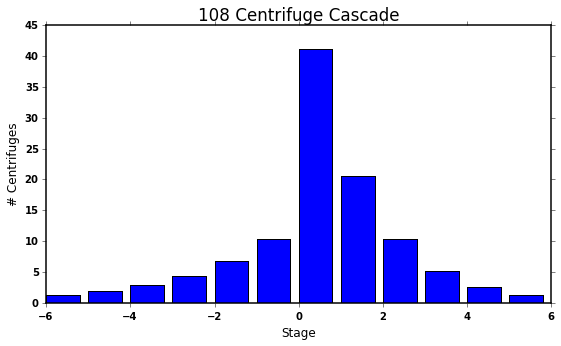

In [54]:
all_stages = np.array(strip_stages+enrich_stages)
n_centrifuges = np.sum(all_stages[:,1], axis=0)

bar_width = 0.8
bar_res = plt.bar(all_stages[:,0], all_stages[:,1], bar_width)

plt.xlabel('Stage')
plt.ylabel('# Centrifuges')
plt.title(str(int(n_centrifuges)) + " Centrifuge Cascade")
plt.legend()

plt.tight_layout()
plt.show()


Given the ideal cascade above, how does the product enrichment change with different feed enrichment?
How much new product is produced given the new feed rate?

In [55]:
Npc_mod = Npc_from_Nstages(alpha, Nfc_mod, n_stage_en)
Nwc_mod = Nwc_from_Nstages(alpha, Nfc_mod, n_stage_str)

print "Cascade optimized for feed= ", Nfc, " tails= ", Nwc
print "When used with feed= ", Nfc_mod, " product= ", Npc_mod, " tails= ", Nwc_mod 


Cascade optimized for feed=  0.0071  tails=  0.001
When used with feed=  0.2  product=  0.612777110969  tails=  0.0282188970756


In [56]:
# starting feed stages and enrichment are starting cascade values
Nfs = Nfc_mod
Fs_mod = Fc_mod
print "stage, Feed,   Product,    N_F,     N_P"
enrich_stages = []
for i in range(0, n_stage_en):  
    Nps = N_product_by_alpha(alpha, Nfs)
    Ps_mod = product_per_enr_stage(alpha, Nfs, Nps, Fs_mod)
    if (i == 1):
        W_enr1_mod = Fs_mod - Ps_mod
        Nw_enr1_mod = (Fs_mod*Nfs - Ps_mod*Nps)/W_enr1
    print i, Fs_mod, Ps_mod,  Nfs, Nps
    Nfs = Nps
    Fs_mod = Ps_mod
print "product of cascade (kg/mon)" , Fs_mod*60*60*24*30

stage, Feed,   Product,    N_F,     N_P
0 1.75134015595e-05 9.29532403177e-06 0.2 0.246356490657
1 9.29532403177e-06 4.99980021522e-06 0.246356490657 0.299435945214
2 4.99980021522e-06 2.73011911683e-06 0.299435945214 0.358511449134
3 2.73011911683e-06 1.5155708983e-06 0.358511449134 0.422217674571
4 1.5155708983e-06 8.56185939672e-07 0.422217674571 0.488621549714
5 8.56185939672e-07 4.92424710834e-07 0.488621549714 0.555429460226
product of cascade (kg/mon) 1.27636485048


In [57]:
F_strip_mod = W_enr1_mod
Nf_strip = Nw_enr1_mod

print "stage,    Feed,    W_strip,   Nf_strip,   Nw_strip"
strip_stages = []
for i in range(1, n_stage_str):  
    Nw_strip = N_waste_by_alpha(alpha, Nf_strip)
    W_strip_mod = waste_per_strip_stage(alpha, Nf_strip, Nw_strip, F_strip_mod)
    strip_stages.append([-1*i,n_mach_s])
    print i, F_strip_mod, W_strip_mod, Nf_strip, Nw_strip
    F_strip_mod = W_strip_mod
    Nf_strip = Nw_strip
    
print "waste of cascade (kg/mon)" , W_strip_mod*60*60*24*30


stage,    Feed,    W_strip,   Nf_strip,   Nw_strip
1 4.29552381655e-06 2.80085389477e-06 0.0112792989173 0.0086492367959
2 2.80085389477e-06 1.82740189741e-06 0.0086492367959 0.00662833080148
3 1.82740189741e-06 1.19284632443e-06 0.00662833080148 0.00507719395
4 1.19284632443e-06 7.78921317622e-07 0.00507719395 0.00388762767474
5 7.78921317622e-07 5.08773316746e-07 0.00388762767474 0.00297593837093
6 5.08773316746e-07 3.32390243186e-07 0.00297593837093 0.00227756088882
waste of cascade (kg/mon) 0.861555510339
